<a href="https://colab.research.google.com/github/esferita006/Probabilidad/blob/main/Ejercicios_de_probabilidad_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color="Teal" face="Comic Sans MS,arial">
  <h1 align="center"><i>EJERCICIOS DE PROBABILIDAD</i></h1>
</font>

<font color="Black" face="Comic Sans MS,arial">
  <h5 align="center"><i>Acontinuacon se presentan algunos ejercicios de probabilidad </i></h5>
</font>

<font color="Teal" face="Comic Sans MS,arial">
  <h1 align="center"><i>EJERCICIO_1</i></h1>
</font>

<font color="Black" face="Comic Sans MS,arial">
  <h5 ><i>Este código genera gráficas en tres dimensiones de distribuciones normales bivariadas. Comienza definiendo los parámetros de la distribución: las medias marginales (mu1 y mu2) se establecen en cero, y las varianzas marginales (sigma1_squared y sigma2_squared) se establecen en uno. Luego, se define una lista de correlaciones (correlations) que contiene los valores de correlación para generar las distribuciones bivariadas.

El código crea una malla de puntos en el rango [-3, 3] para las variables X e Y, y luego utiliza estas coordenadas para generar las distribuciones bivariadas correspondientes a cada valor de correlación. La función de densidad de probabilidad se calcula utilizando la fórmula de la distribución normal bivariada.

Para cada correlación, se crea una figura y ejes 3D, y se grafica la superficie tridimensional utilizando el método plot_surface de matplotlib. Las etiquetas de los ejes se configuran adecuadamente, y el título de la gráfica muestra el valor de la correlación correspondiente.

Finalmente, se muestra la gráfica utilizando la función show() de matplotlib.</i></h5>
</font>

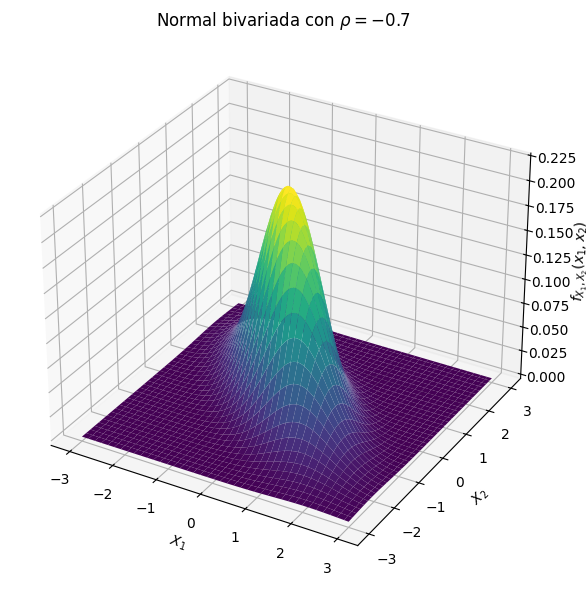

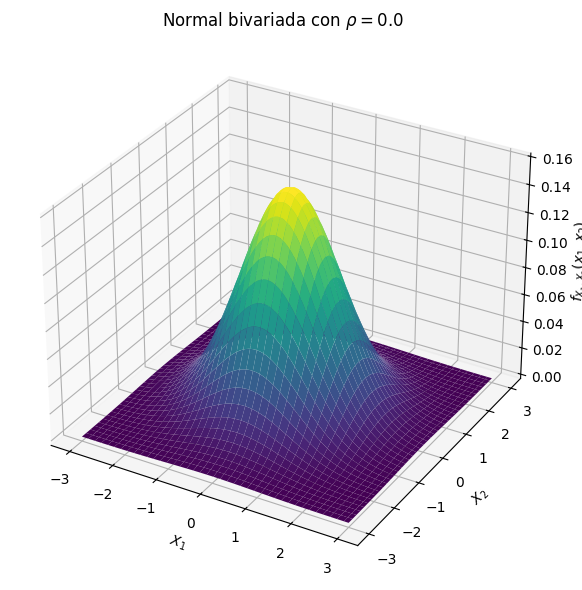

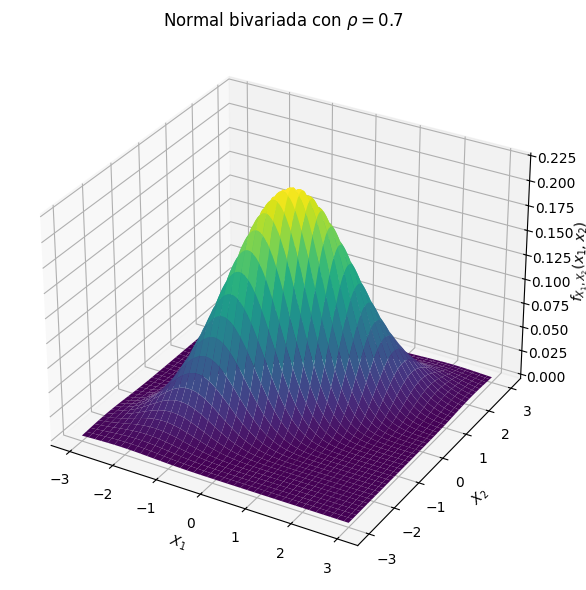

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# =============================================================================
# Distribución Normal Bivariada: visualización 3D para distintos valores de rho
# =============================================================================

# -----------------------------
# Parámetros marginales
# -----------------------------
mu1 = 0.0
mu2 = 0.0
sigma1 = 1.0
sigma2 = 1.0

# Valores de correlación
correlations = [-0.7, 0.0, 0.7]

# -----------------------------
# Malla de puntos
# -----------------------------
x = np.linspace(-3, 3, 120)
y = np.linspace(-3, 3, 120)
X, Y = np.meshgrid(x, y)

# -----------------------------
# Función densidad normal bivariada
# -----------------------------
def bivariate_normal_pdf(x, y, mu1, mu2, sigma1, sigma2, rho):
    """
    Densidad de la normal bivariada.

    Parameters
    ----------
    x, y : np.ndarray
        Mallas de puntos.
    mu1, mu2 : float
        Medias.
    sigma1, sigma2 : float
        Desviaciones estándar.
    rho : float
        Correlación (-1 < rho < 1).

    Returns
    -------
    np.ndarray
        Valores de la densidad f(x,y).
    """
    if abs(rho) >= 1:
        raise ValueError("La correlación debe satisfacer |rho| < 1")

    z1 = (x - mu1) / sigma1
    z2 = (y - mu2) / sigma2

    coef = 1.0 / (2 * np.pi * sigma1 * sigma2 * np.sqrt(1 - rho**2))

    exponent = -1.0 / (2 * (1 - rho**2)) * (
        z1**2 + z2**2 - 2 * rho * z1 * z2
    )

    return coef * np.exp(exponent)

# -----------------------------
# Gráficas 3D
# -----------------------------
for rho in correlations:
    Z = bivariate_normal_pdf(X, Y, mu1, mu2, sigma1, sigma2, rho)

    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection="3d")

    ax.plot_surface(X, Y, Z, cmap="viridis", linewidth=0, antialiased=True)

    ax.set_xlabel("$X_1$")
    ax.set_ylabel("$X_2$")
    ax.set_zlabel("$f_{X_1,X_2}(x_1,x_2)$")
    ax.set_title(f"Normal bivariada con $\\rho = {rho}$")

    plt.tight_layout()
    plt.show()



<font color="Teal" face="Comic Sans MS,arial">
  <h1 align="center"><i>EJERCICIO_2</i></h1>
</font>

<font color="Black" face="Comic Sans MS,arial">
  <h5 ><i>Este código genera gráficas de curvas de nivel para distribuciones bivariadas con diferentes correlaciones. Comienza definiendo los parámetros de la distribución: las medias marginales (mu1 y mu2) se establecen en cero, y las varianzas marginales (sigma1_squared y sigma2_squared) se establecen en uno. Luego, se define una lista de correlaciones (correlations) que contiene los valores de correlación para generar las distribuciones bivariadas.

A continuación, se crea una malla de puntos en el rango [-3, 3] para las variables X e Y, y se utiliza para generar las distribuciones bivariadas correspondientes a cada valor de correlación. La función de densidad de probabilidad se calcula utilizando la fórmula de la distribución normal bivariada.

Para cada correlación, se crea una nueva figura y se grafican las curvas de nivel utilizando plt.contour(). La función contour utiliza los valores de X, Y y Z para trazar las líneas de nivel que representan la distribución bivariada.

A continuación, se determina la familia de cónicas a la que pertenecen las curvas de nivel, según el valor de la correlación. Dependiendo de si la correlación es -1, 1, 0 o se encuentra entre -1 y 1, se asigna una etiqueta de "Parábola", "Circunferencia", "Elipse" o "Hipérbola", respectivamente.

Se configuran el título y las etiquetas de los ejes de la gráfica, utilizando los valores de correlación y el tipo de conica determinado. Por último, se muestra la gráfica utilizando la función show() de matplotlib.
</i></h5>
</font>

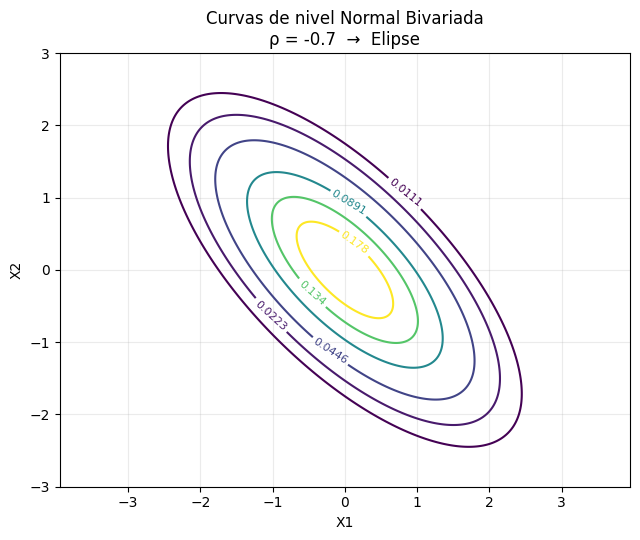

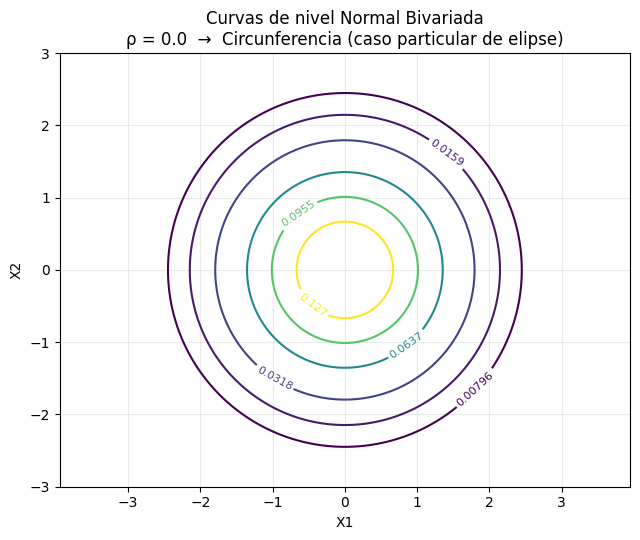

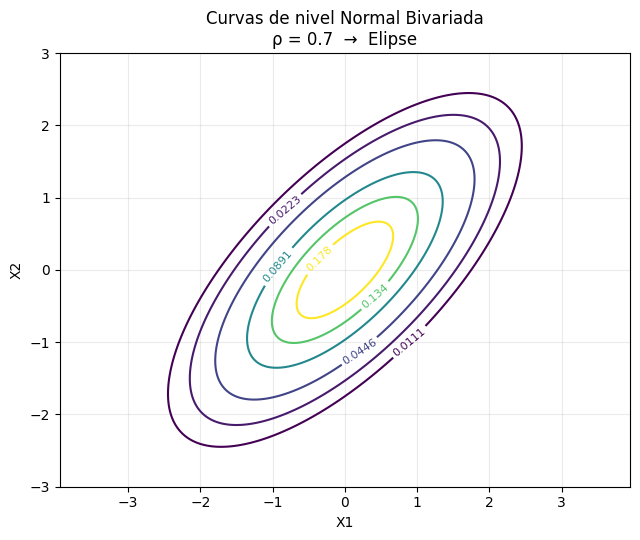

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# =============================================================================
# Curvas de nivel de la Normal Bivariada y clasificación de la cónica
# =============================================================================
# Para |rho| < 1 y Sigma positiva definida, las curvas de nivel de la densidad
# son ELIPSES (circunferencia es un caso particular).
#
# Si |rho| = 1, Sigma es singular: no hay densidad 2D regular (colapsa a una recta).
# =============================================================================

# Parámetros
mu1 = 0.0
mu2 = 0.0
sigma1 = 1.0
sigma2 = 1.0

correlations = [-0.7, 0.0, 0.7]

# Malla
x = np.linspace(-3, 3, 250)
y = np.linspace(-3, 3, 250)
X, Y = np.meshgrid(x, y)

def bivariate_normal_pdf(x, y, mu1, mu2, sigma1, sigma2, rho):
    """
    Densidad f(x,y) de N2((mu1,mu2), Sigma) con correlación rho.
    """
    if abs(rho) >= 1:
        raise ValueError("|rho| debe ser < 1 para una densidad bivariada regular.")

    z1 = (x - mu1) / sigma1
    z2 = (y - mu2) / sigma2

    coef = 1.0 / (2 * np.pi * sigma1 * sigma2 * np.sqrt(1 - rho**2))
    expo = -1.0 / (2 * (1 - rho**2)) * (z1**2 + z2**2 - 2 * rho * z1 * z2)
    return coef * np.exp(expo)

def conic_type_from_quadratic(sigma1, sigma2, rho, tol=1e-12):
    """
    Clasifica la cónica de las curvas de nivel del exponente (forma cuadrática).
    Para la normal bivariada con Sigma PD, siempre es ELIPSE.
    """
    # Matriz de la forma cuadrática asociada a (x-mu)' Sigma^{-1} (x-mu)
    # up to a positive scalar. Basta analizar definitud/discriminante.
    # La matriz de covarianza es:
    #   Sigma = [[sigma1^2, rho*sigma1*sigma2],
    #            [rho*sigma1*sigma2, sigma2^2]]
    #
    # Para |rho|<1 y sigma1,sigma2>0 => Sigma es PD => Sigma^{-1} también PD
    # => forma cuadrática definida positiva => elipses.

    if abs(rho) >= 1 - tol:
        return "Degenerada (colapsa a una recta; no hay densidad 2D)"

    # Caso especial: circunferencia si Sigma es proporcional a identidad:
    # sigma1 = sigma2 y rho = 0
    if abs(rho) < tol and abs(sigma1 - sigma2) < tol:
        return "Circunferencia (caso particular de elipse)"

    return "Elipse"

# Gráficas
for rho in correlations:
    Z = bivariate_normal_pdf(X, Y, mu1, mu2, sigma1, sigma2, rho)
    conic_type = conic_type_from_quadratic(sigma1, sigma2, rho)

    plt.figure(figsize=(6.5, 5.5))

    # Niveles: tomamos cuantiles relativos al máximo para comparar entre rhos
    zmax = Z.max()
    levels = zmax * np.array([0.05, 0.10, 0.20, 0.40, 0.60, 0.80])

    cs = plt.contour(X, Y, Z, levels=levels)
    plt.clabel(cs, inline=True, fontsize=8, fmt="%.3g")

    plt.title(f"Curvas de nivel Normal Bivariada\nρ = {rho}  →  {conic_type}")
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.axis("equal")
    plt.grid(alpha=0.25)
    plt.tight_layout()
    plt.show()


<font color="Teal" face="Comic Sans MS,arial">
  <h1 align="center"><i>EJERCICIO_3</i></h1>
</font>

<font color="Black" face="Comic Sans MS,arial">
  <h5 ><i>Este código realiza simulaciones de variables aleatorias y grafica las densidades correspondientes. Comienza simulando una variable aleatoria X que sigue una distribución normal con media -1 y desviación estándar 2. Se generan 100,000 valores aleatorios de X utilizando la función np.random.normal().

Luego, se grafica la densidad de X utilizando plt.hist(). Se utiliza el argumento density=True para obtener una densidad normalizada en lugar de un histograma de frecuencias. Se configuran el título, las etiquetas de los ejes y se muestra la gráfica utilizando la función show() de matplotlib.

A continuación, se simula una variable aleatoria Y que sigue una distribución normal con media 1 y desviación estándar 4. Se generan 100,000 valores aleatorios de Y utilizando np.random.normal().

Se grafica la densidad de Y de manera similar a la densidad de X, configurando el título, las etiquetas de los ejes y mostrando la gráfica.

Finalmente, se calcula la variable aleatoria Z como Z = 2X - 3Y. Se realiza la operación correspondiente utilizando los valores simulados de X e Y.

Se grafica la densidad de Z de manera similar a las densidades anteriores, configurando el título, las etiquetas de los ejes y mostrando la gráfica.
</i></h5>
</font>

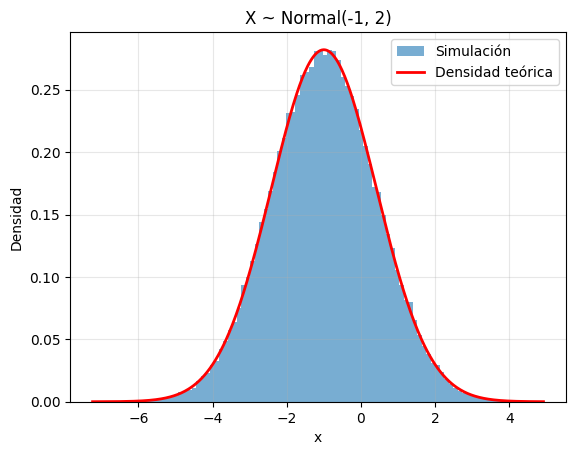

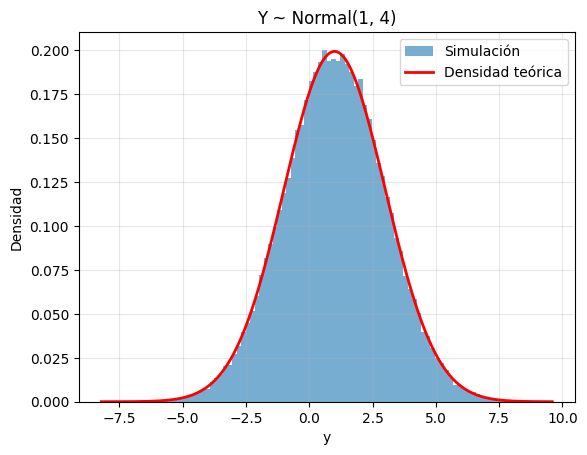

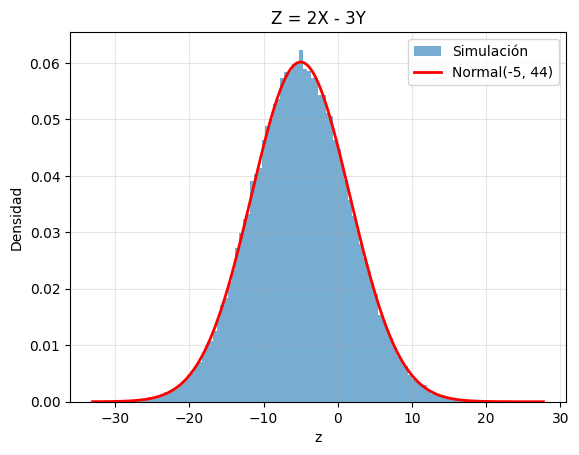

Parámetros teóricos de Z:
Media teórica:     -5
Varianza teórica:  44

Estimaciones empíricas:
Media simulada:    -5.0248
Varianza simulada: 43.9221


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# =============================================================================
# Simulación de combinaciones lineales de normales
# =============================================================================

np.random.seed(123)  # Reproducibilidad
n = 100_000

# -----------------------------
# X ~ N(-1, 2)
# -----------------------------
mu_X = -1
var_X = 2
sigma_X = np.sqrt(var_X)
X = np.random.normal(mu_X, sigma_X, n)

plt.figure()
plt.hist(X, bins=100, density=True, alpha=0.6, label="Simulación")

x_vals = np.linspace(X.min(), X.max(), 500)
plt.plot(x_vals, norm.pdf(x_vals, mu_X, sigma_X), 'r', lw=2, label="Densidad teórica")

plt.title("X ~ Normal(-1, 2)")
plt.xlabel("x")
plt.ylabel("Densidad")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# -----------------------------
# Y ~ N(1, 4)
# -----------------------------
mu_Y = 1
var_Y = 4
sigma_Y = np.sqrt(var_Y)
Y = np.random.normal(mu_Y, sigma_Y, n)

plt.figure()
plt.hist(Y, bins=100, density=True, alpha=0.6, label="Simulación")

y_vals = np.linspace(Y.min(), Y.max(), 500)
plt.plot(y_vals, norm.pdf(y_vals, mu_Y, sigma_Y), 'r', lw=2, label="Densidad teórica")

plt.title("Y ~ Normal(1, 4)")
plt.xlabel("y")
plt.ylabel("Densidad")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# -----------------------------
# Z = 2X - 3Y
# -----------------------------
Z = 2 * X - 3 * Y

# Parámetros teóricos de Z
mu_Z = 2 * mu_X - 3 * mu_Y
var_Z = 2**2 * var_X + (-3)**2 * var_Y
sigma_Z = np.sqrt(var_Z)

plt.figure()
plt.hist(Z, bins=120, density=True, alpha=0.6, label="Simulación")

z_vals = np.linspace(Z.min(), Z.max(), 500)
plt.plot(z_vals, norm.pdf(z_vals, mu_Z, sigma_Z), 'r', lw=2,
         label=f"Normal({mu_Z}, {var_Z})")

plt.title("Z = 2X - 3Y")
plt.xlabel("z")
plt.ylabel("Densidad")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# -----------------------------
# Verificación numérica
# -----------------------------
print("Parámetros teóricos de Z:")
print(f"Media teórica:     {mu_Z}")
print(f"Varianza teórica:  {var_Z}")

print("\nEstimaciones empíricas:")
print(f"Media simulada:    {np.mean(Z):.4f}")
print(f"Varianza simulada: {np.var(Z):.4f}")
